### importamos las librerias a utilizar

In [66]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os


### Preparacion de espacio de trabajo

especificamos la ruta de nuestro dataset, un arreglo para guardar las categorias que vayamos encontrando y la dimension a trabajar con nuestras imagenes

In [67]:
DATADIR = '/home/lenin/Documents/datasets/colores'
CATEGORIES = []
IMG_SIZE=3

recorremos el direcotorio excluyendo las imagenes de testeo

In [68]:
negative = ['testimg','old']
for cate in os.listdir(DATADIR):
    if cate in negative: continue
    CATEGORIES.append(cate)
print(f'categorias encontradas: {CATEGORIES}\n total: {len(CATEGORIES)}')

categorias encontradas: ['morado', 'azul', 'rojo', 'amarillo', 'gris', 'rosado', 'negro', 'naranja', 'celeste', 'verde', 'blanco', 'cafe']
 total: 12


### Recoleccion de datos
recorremos el directorio tomando cada imagen segun su respectiva categoria

In [69]:
training_data=[] #var para los datos recolectados
labels=0
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for fname in os.listdir(path):
        img = load_img((path+'/'+fname), target_size=(IMG_SIZE,IMG_SIZE))
        x = img_to_array(img)
        x=x/255
        training_data.append([x,labels])
    print(f'{category} : {labels}')
    labels+=1
print('done')

morado : 0
azul : 1
rojo : 2
amarillo : 3
gris : 4
rosado : 5
negro : 6
naranja : 7
celeste : 8
verde : 9
blanco : 10
cafe : 11
done


verificamos el total de datos que tenemos

In [70]:
lenofimage = len(training_data)
print(lenofimage)

18480


### Tratamiento de los datos
separamos  nuestra data en img-labels y los tratamos con numpy

In [71]:
X=[]
y=[]
for img, label in training_data:
    X.append(img)
    y.append(label)
print('done')
del training_data

done


verificamos la forma de nuestra data

In [72]:
X=np.array(X)
y=np.array(y)
print('labels',y.shape)
print('img',X.shape)

labels (18480,)
img (18480, 3, 3, 3)


dividimos la data para train y test

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'train: {len(X_train)}, test: {len(X_test)}')
del X
del y

train: 13860, test: 4620


### Creacion del modelo
creamos la arquitectura del modelo, lo compilamos y finalmente ajustamos

In [78]:
model = Sequential()
model.add(Flatten(input_shape=(X_train[0].shape)))
model.add(Dense(6, activation='relu'))
model.add(Dense(len(CATEGORIES), activation='softmax'))


In [25]:
# model = Sequential([
#     Conv2D(32, (2,2), activation='relu', padding='SAME', input_shape=X_train[0].shape),
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(10, activation='relu'),
#     Dense(len(CATEGORIES), activation='softmax'),
# ])

In [32]:
# model = Sequential()

# model.add(Conv2D(18, (1, 1), activation='relu', padding='SAME', input_shape=X_train[0].shape))
# # model.add(MaxPooling2D((2, 2)))

# # model.add(Conv2D(64, (3, 3), padding='SAME', activation='relu'))
# # model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())
# model.add(Dense(10, activation='relu'))
# model.add(Dense(len(CATEGORIES), activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [79]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=12, batch_size=25)

Epoch 1/12
555/555 [==============================] - 3s 4ms/step - loss: 1.9332 - accuracy: 0.3477
Epoch 2/12
555/555 [==============================] - 2s 4ms/step - loss: 0.9808 - accuracy: 0.8162
Epoch 3/12
555/555 [==============================] - 2s 4ms/step - loss: 0.5772 - accuracy: 0.8802
Epoch 4/12
555/555 [==============================] - 2s 4ms/step - loss: 0.4125 - accuracy: 0.9060
Epoch 5/12
555/555 [==============================] - 2s 4ms/step - loss: 0.3308 - accuracy: 0.9216
Epoch 6/12
555/555 [==============================] - 2s 4ms/step - loss: 0.2817 - accuracy: 0.9262
Epoch 7/12
555/555 [==============================] - 2s 4ms/step - loss: 0.2501 - accuracy: 0.9295
Epoch 8/12
555/555 [==============================] - 2s 4ms/step - loss: 0.2275 - accuracy: 0.9334
Epoch 9/12
555/555 [==============================] - 2s 4ms/step - loss: 0.2105 - accuracy: 0.9362
Epoch 10/12
555/555 [==============================] - 2s 4ms/step - loss: 0.1972 - accuracy: 0.9382

verificamos la precision en testeo

In [80]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

test loss 0.1726434826850891
test accuracy 0.9435064792633057


### Probamos el modelo entrenado

prediccion = rosado


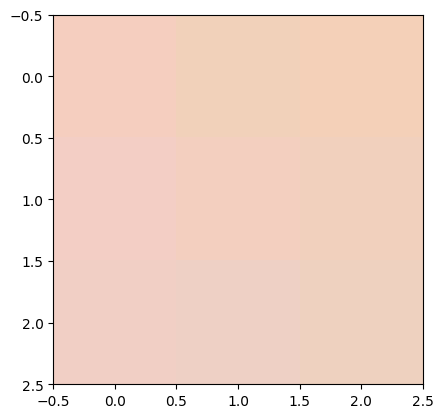

In [83]:
# # Cargar la estructura del modelo
modelo_cargado = tf.keras.models.load_model("mod_color_v1_3x3.h5")
# # Cargar los pesos del modelo
modelo_cargado.load_weights("mod_color_v1_weights_3x3.h5")

#ruta a nuestras imagenes de test en el directorio, no de la data preparada
path = DATADIR + '/testimg' + '/7.jpeg' 

#tratamos la img con el mismo tamanio y la normalizamos
img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
x = img_to_array(img)
x=x/255

#agrego un eje para que el modelo lo reciba
x = x[np.newaxis, ...]

#imprimo la img y la prediccion
plt.imshow(img)
resp = modelo_cargado.predict(x, verbose=0)
print(f'prediccion = {CATEGORIES[np.argmax(resp[0])]}')

### Exportacion
con el modelo ya funcionando correctamente, lo exportamos para poder utilizarlo en otros proyectos

In [81]:
model.save('mod_color_v1_3x3.h5')
model.save_weights("mod_color_v1_weights_3x3.h5")

In [ ]:
# model.save('mod_color_v1_1x1.h5')
# model.save_weights("mod_color_v1_weights_1x1.h5")

para cargarlos

In [17]:
# # Cargar la estructura del modelo
# modelo_cargado = tf.keras.models.load_model("mod_color_v1.h5")

# # Cargar los pesos del modelo
# modelo_cargado.load_weights("mod_color_v1_weights.h5")
# convd 
# drop out 
# max poling 
# padding 